# **Sale Data Analyzing:**

## Importing Libraries:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data and Merging:

In [2]:
#saving path to a variable:
path='./Sales_Data/'

#save files names:
files=(file for file in os.listdir(path) if file.endswith('.csv'))

#creating an empty data frame:
All_data=pd.DataFrame()

#read all files in a single data frame(prevents from  duplicate headers)
for i,file in enumerate(files):
  df=pd.read_csv(path+file)

  if i>0:
    df=df[1:]
    All_data=pd.concat([All_data,df])
  else:
    All_data=df

#save to new csv file
All_data.to_csv('All_data.csv',index=False)





## Reading from new file and Cleaning Data

In [3]:
df=pd.read_csv('All_data.csv')


### Dealing with NaN values:

In [4]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df.dropna(how='all',inplace=True)

In [6]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### checking for duplicate values:

In [7]:
df.duplicated().sum()

618

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

## Add column for better analysis

### change columns names and remove space:

In [10]:
df.columns=df.columns.str.replace(' ','_')

### Change order Date to datetime

In [11]:
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [12]:
df=df[df['Order_Date'].str[:2]!='Or'] #we had some rows with string values

In [13]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

C:\Users\milad\AppData\Local\Temp\ipykernel_17428\1882151666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])


In [14]:
df['Price_Each']=df['Price_Each'].astype('float')
df['Quantity_Ordered']=df['Quantity_Ordered'].astype('int')

In [15]:
#checktypes:
df.dtypes

Order_ID                    object
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

In [16]:
# Adding sales column:
df['Sales']=df['Quantity_Ordered']*df['Price_Each']

In [17]:
#Adding Month Column:
df['Month']=df['Order_Date'].dt.month.astype('int')

In [18]:
#adding city:
df['City']=df['Purchase_Address'].str.split(',').str[1]
#adding State:
df['State']=df['Purchase_Address'].str.split(',').str[2].str.split().str[0]


In [19]:
display(df.dtypes)
df.head()


Order_ID                    object
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Sales                      float64
Month                        int32
City                        object
State                       object
dtype: object

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Month,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA


## Analyzing Data:

### Sales per Month:

In [20]:
#SAles per month
result=df.groupby(['Month'])['Sales'].sum()
result


Month
1     1820713.16
2     2199378.08
3     2804273.35
4     3389217.98
5     3150604.24
6     2576268.20
7     2646311.32
8     2241059.39
9     2094450.33
10    3734397.87
11    3197863.06
12    4606595.70
Name: Sales, dtype: float64

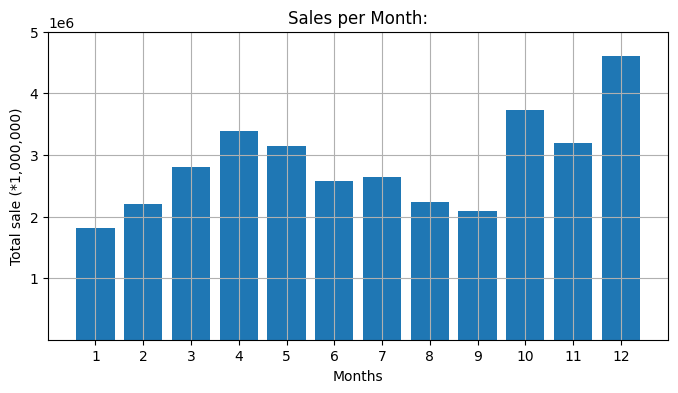

In [21]:
plt.figure(figsize=(8,4))
plt.bar(x=result.index,height=result.values)
plt.xticks(result.index)
plt.yticks([1000000,2000000,3000000,4000000,5000000])
plt.title('Sales per Month:')
plt.xlabel('Months')
plt.ylabel('Total sale (*1,000,000)')
plt.grid(True)
plt.show()


### Quntity ordered per Month:


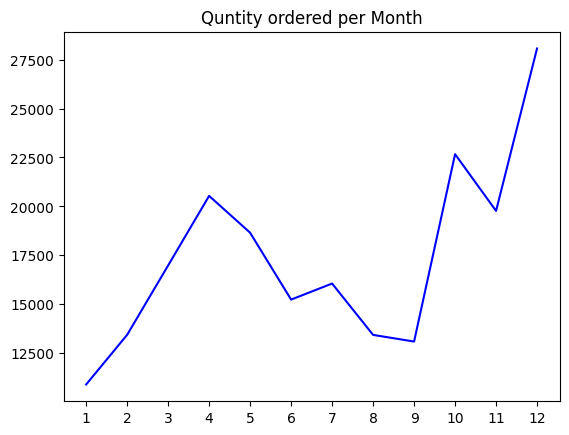

In [23]:
#Quantity ordered per month
result=df.groupby('Month').agg({'Quantity_Ordered':'sum'})
plt.title('Quntity ordered per Month')
plt.plot(result.index,result['Quantity_Ordered'],color='blue')
plt.xticks(result.index)


# Scale 'Quantity_Ordered'

plt.show()


City
 Atlanta          2794049.07
 Austin           1817344.33
 Boston           3657927.65
 Dallas           2764993.97
 Los Angeles      5448288.92
 New York City    4660143.16
 Portland         2318619.99
 San Francisco    8254743.55
 Seattle          2745022.04
Name: Sales, dtype: float64